# Lab 8: Applications of Markov chains and graphs

In this lab we will be looking at some applications of Markov chains and graphs, namely, the page rank algorithm, an introduction to statistical inference with a Markov model, and cache replacement policies.

Below is the code to import the modules we will be using throughout this lab.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import csv as csv
import networkx as nx
import random as random
print "Modules Imported!"

# Markov chain object similar to random variable objects in scipy.stats (st)

class Markov_chain:
    def __init__(self, P, pi0):   # The transition probability matrix and initial distribution are passed
        self.P = P 
        self.pi0 = pi0
        self.n=np.size(pi0)
        if np.shape(P) != (self.n,self.n):
            print "Error: Shape of P doesn't match pi0"
   
    def rvs(self,T):     # produce a length T segment of variates of the random process
        X = [np.random.choice(self.n, p=self.pi0)]  # p is a needed input for np.random.choice()
        for t in range(1,T):
            X.append(np.random.choice(self.n, p=self.P[X[t-1],:])) 
        return np.array(X)
    
    def pi(self,t):    # produce probability distribution at time t
        pi_new=self.pi0
        for s in range(t):
            pi_new = np.dot(pi_new, self.P)    # one step update of probability distribution(dot product)
        return pi_new
print "Markov_chain class defined"


Modules Imported!
Markov_chain class defined


In [2]:
n = 5
p = [0.1, 0.2, 0.3, 0.2, 0.2]
for i in range(0, 5):
    print np.random.choice(n, p=p)

3
2
2
2
2


## Page Rank Algorithm

Now that we see how to generate, manipulate, and plot graphs, we can investigate Page's ranking algorithm for webpages, which uses a Markov chain based on the graphical structure of the set of web pages on the Internet.  Suppose now that we have a directed graph that represents a set of web pages; a link from one webpage to another designates that the first webpage has a hyperlink to the second webpage.   Then webpages that have more incoming edges should have a higher rank.   If the webpages pointing into a particular webpage have higher ranks, then the ranking of the webpage pointed to should be even higher.    These ideas are encapsulated in the pagerank algorithm, which is based on a Markov chain with the following one-step transition probability matrix:  
$p_{i,j} = \frac{dA_{i,j}}{\mbox{out_degree}(i)} +  \frac{1-d}{n}.$  Here $A$ represents the adjacency matrix of the graph, so that $A_{i,j}=1$ if there is an edge from $i$ to $j,$  and $A_{i,j}=0$ otherwise.
Originally Google used $d$=85%. That is, if the current state is $i$, then a biased coin is flipped with heads showing with probability $d.$   If heads shows, then the next state is one of the nodes pointed to by node $i,$  with all choices having equal probability.  If tails shows, the next node is selected at random from among all nodes in the graph, each with equal probability.  There is a slight problem about what to do if a node has outdegree zero because in that case the first term is not well defined; you will be asked to address this problem.

The following code generates a random directed graph, and then ranks the popularity of the nodes in the graph using the pagerank method. The code uses the adjacency matrix of the graph, mentioned above. Instead of using the equilibrium distribution for the Markov chain, we use the probability distribution of the chain after 100 time steps.  The row sums of the adjacency matrix give the outdegrees.  One way to think about it is that the Markov chain models a person randomly clicking through webpages.  Pages are ranked according to the probability distribution of which page the person has reached after 100 time steps.

In [57]:
x = np.ones(10)
print x
type(x)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


numpy.ndarray

In [69]:
st.rankdata([2., 3., 2., 2.])

array([ 2.,  4.,  2.,  2.])

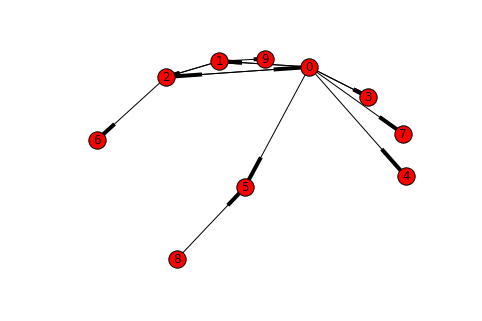

10
[ 0.041  0.044  0.079  0.1    0.131  0.166  0.151  0.115  0.1    0.074]
rank vector [ 10.   9.   7.   6.   3.   1.   2.   4.   5.   8.]
Simulated state sequence:  [3 8 7 7 8 7 7 8 7 6 6 5 6 6 5 4 3 4 5 5 4 4 4 4 4 4 5 6 7 7 7 8 8 5 6 5 0
 1 2 0 1 9 8 7 7 8 9 9 1 2 3 2 1 2 6 5 5 5 6 6 5 6 5 5 4 5 5 5 6 7 7 8 0 2
 3 4 5 4 5 5 6 5 3 4 3 4 3 2 0 1 2 9 9 8 5 3 4 5 6 7]
[-2, -4, -8, -6, -16, -19, -11, -12, -11, -11]
[ 10.   9.   7.   8.   2.   1.   5.   3.   5.   5.]
[ 0.04094109  0.04410472  0.07862155  0.10005088  0.13062426  0.16624473
  0.15061265  0.11460258  0.10021005  0.07398749]


In [21]:
# A simulation of the pagerank algorithm
#import networkx as nx

# Create a random directed graph object and plot it:
G = nx.scale_free_graph(10, alpha=0.2, beta=0.4, gamma=0.4)   
nx.draw(G,with_labels=1)
plt.show()

A1 = [[  0.,  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
      [  1.,  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
      [  0.,  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
      [  0.,  0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
      [  0.,  0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.],
      [  0.,  0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.],
      [  0.,  0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.],
      [  0.,  0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.],
      [  0.,  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.],
      [  0.,  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.],]

# Next we add identity matrix to the adjacency matrix, which
# is equivalent to adding a self loop to each node.
# This is a way to make the out degree of every node nonzero.
# nx returns adjacency matrix in Scipy sparse format; toarray() converts to dense format
#n = G.number_of_nodes()
print n
A = np.array(nx.adjacency_matrix(G).toarray()) + np.identity(n) + A1
#print "Adjacency", nx.adjacency_matrix(G)
#print A #A is the Adjacency matrix

                                                       
d=0.85    # continuation parameter for pagerank
 # Next, define transition probability matrix for page rank algoritm
P=d*A/A.sum(axis=1)[:,np.newaxis]  + ((1-d)/n)*np.ones((n,n))
#print np.round(1000*P)/1000
pi0=np.ones((n))/n
#print pi0

markov=Markov_chain(P, pi0)  # Uses Markov_chain class defined in first code cell above
    
print np.round(markov.pi(100)*1000)/1000
print "rank vector", st.rankdata(-markov.pi(100))  # larger probabilities map to smaller numbers
print "Simulated state sequence: ", markov.rvs(100)   # Prints simulation of Markov chain
sequences = markov.rvs(100).tolist()
type(sequences)
rank = []
for i in range(0, 10):
    rank.append(-sequences.count(i))
print rank
print st.rankdata(rank)
print markov.pi(100)

In [5]:
sum([ 0.136,  0.136,  0.136, 0.258,  0.015,  0.015,  0.015,  0.136,  0.136,  0.015])

0.9980000000000001

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Run the above code and examine the output for a few graphs.  The nodes are numbered from 0 to n-1, and the rank vector gives the popularity rank for each node.  For example, the position of the one in the rank vector denotes the most popular node.
<ol><li> Qualitatively comment on the graphs. Where does it appear that the most popular nodes are?</li>
<li> The above code uses a particular method to deal with nodes that have no neighbors.   Perhaps it is not fair, because it rewards nodes that have no links to other nodes.   Propose and implement another method for dealing with nodes that have no outgoing links that you think is better.  Explain why you think your method is better.</li>

#1. With this algrithm, the most popular nodes are always be the nodes that have no outgoing vectors. That means all the popular nodes are the sinks of of vecters appear in the graph. However, this is not ture in realistic. In fact, we need to find nodes than have the most ingoing vecters among all the nodes.

#2.
For this problem, we want to prevent A.sum(axis=1)[:,np.newaxis] equals 0.
The original method is to add an identity matrix to A, but this causes a problem.
In the modified version: 
we want to go to any other websites from the current websites randomly if A.sum equals 0.
Therefore, we check the sum of each row of A.
If the sum equals 0, we replace elements in the row with 1s. Otherwise, leave it alone.
This version of code is more realistic. When we browsing an website without hyperlinks on it,
we basically go to any websites avalaible.


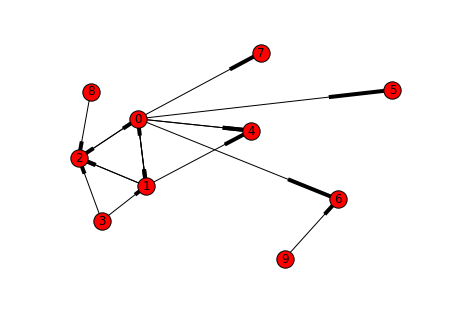

A before modified:
[[0 2 1 0 2 1 1 1 0 0]
 [1 0 2 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
A after modified:
[[0 2 1 0 2 1 1 1 0 0]
 [1 0 2 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]
rank vector [ 5.   6.   4.   7.   3.   8.   9.5  9.5  1.   2. ]
Simulated state sequences:  [7 7 7 7 2 0 1 2 5 0 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 1 1 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 9 9 9 9 9 9 9 9 5 5 5 9 1 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 8 8 8]


In [45]:
#2. 
print "#2."
print "For this problem, we want to prevent A.sum(axis=1)[:,np.newaxis] equals 0."
print "The original method is to add an identity matrix to A, but this causes a problem."
print "In the modified version: "
print "we want to go to any other websites from the current websites randomly if A.sum equals 0."
print "Therefore, we check the sum of each row of A."
print "If the sum equals 0, we replace elements in the row with 1s. Otherwise, leave it alone."
print "This version of code is more realistic. When we browsing an website without hyperlinks on it,"
print "we basically go to any websites avalaible."

# A simulation of the pagerank algorithm
#import networkx as nx


# Create a random directed graph object and plot it:
G = nx.scale_free_graph(10, alpha=0.2, beta=0.4, gamma=0.4)
nx.draw(G,with_labels=1)
plt.show()

# Next we add indentity matrix to the adjacency matrix, which
# is equivalent to adding to self loop to each node.
# This is a way to make the out degree of every node nonzero.
# nx returns adjacency matrix in Scipy sparse format; toarray() converts to dense format
n = G.number_of_nodes()
A = np.array(nx.adjacency_matrix(G).toarray())

rowSum = A.sum(axis=1)
print "A before modified:"
print A
for i in range(0, len(rowSum)):
    if rowSum[i] == 0:
        A[i] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print "A after modified:"
print A
#for i in range(0, rowSum.size)
d =0.85   # continuation parameter for pagerank
# Next, define transition probability matrix for page rank algoritm
#P = d*A/A.sum(axis=1)[:,np.newaxis] + ((1-d)/n)*np.ones((n,n))
pi0 = np.ones((n))/n

markov = Markov_chain(P, pi0)
print "rank vector", st.rankdata(-markov.pi(100)) # larger probabilites map to small numbers
print "Simulated state sequences: ", markov.rvs(100) # Prints simulation of Markov chain


## Some statistical inference for Markov chains

To prepare for statistical inference for Markov chains, we begin by considering the maximum likelihood (ML) estimator for the distribution of a  sequence of independent, identically distributed discrete random variables.   Specifically, suppose p=[p[0], . . . , p[n-1]] is a probability vector for random variables taking values in {0,1, . . . , n-1}.   That is, p[i] is the probability a generated random variable is equal to i.
Suppose that you don't know what the vector p is, but you observe a sequence of T independent random variables that were generated using p.  How would you estimate p?   A natural guess is to use p_hat[i]=(number of samples equal to i)/T.   Basically, p_hat is just a normalized histogram of p.  It can be shown that this choice of p_hat is the maximum likelihood (ML) estimator of p.  (The usual proof is to use a Lagrange multiplier for the constraint p[0]+ . . . + p[n-1]=1.)  Try running the following code several times and see how well p_hat approximates p.  If T is increased the estimates become more accurate.

In [12]:
p=np.array([0.2,0.2,0.4,0.2])
c=np.arange(np.size(p))
Xcstm = st.rv_discrete(values = (c,p))
T=100  # Number of values generated
values = Xcstm.rvs(size = T)
# print values
print values
print type(values)
print np.bincount(values,minlength=np.size(p))
p_hat=np.bincount(values,minlength=np.size(p))/1./np.size(values)
print "    p:", p
print "p_hat:", p_hat,"(estimate of p based on ", T, "values)"
print "Sum of squared errors:", np.linalg.norm(p-p_hat)**2.  # the norm method calculates the 2-norm by default
print type(p_hat)

[0 1 0 3 2 0 3 0 2 3 1 2 1 3 3 1 1 1 0 0 1 2 2 1 3 2 2 2 2 2 3 3 0 3 0 2 2
 0 2 1 0 1 0 3 0 2 1 2 2 2 2 3 3 2 3 2 0 2 1 1 2 3 1 2 0 2 3 0 1 2 2 0 2 2
 0 3 2 0 1 2 2 2 2 2 2 2 1 0 0 0 1 2 2 2 2 1 2 3 2 1]
<type 'numpy.ndarray'>
[21 20 42 17]
    p: [ 0.2  0.2  0.4  0.2]
p_hat: [ 0.21  0.2   0.42  0.17] (estimate of p based on  100 values)
Sum of squared errors: 0.0014
<type 'numpy.ndarray'>


The same principle can be used to estimate the transition probability matrix for a Markov chain.  
<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>**   Generate a length T simulation of a four state Markov chain using some initial distriubution and some 4x4 transition probability matrix P.  Select P to have some zeros in it, but make sure the process can eventually get to any state starting from any other state.  Then, taking the generated sequence as the only input, generate an estimate, P_hat, of the matrix P.   Your estimator should be more accurate for larger values of T.  (Hint:  For a given state i, the ith row of P is the probability distribution of the next state, given the current state is i.  So to estimate the ith row of P, you should focus on the states that occur just after state i is visited.)

In [62]:
T = 100 # Set time unit to 100
# P is the 4*4 transition probability
P = np.array([[0, 0.3, 0.4, 0.3], [0.3, 0.45, 0.25, 0], [0.25, 0.4, 0, 0.35], [0.35, 0.35, 0.3, 0]])
pi0 = [0.3, 0.1, 0, 0.6] # pi0 is the initial distribution

# Create markov_chain instance with P and pi0
markov = Markov_chain(P, pi0)

pi1 = [1, 0, 0, 0] # 0 state
pi2 = [0, 1, 0, 0] # 1 state
pi3 = [0, 0, 1, 0] # 2 state
pi4 = [0, 0, 0, 1] # 3 state
# Calculate pi in long term (100 time unit)
pi = markov.pi(10000)
# Get the first 10000 states
values = markov.rvs(10000)

p_hat = []
#Write a function to count the number of y that appears after x in an array
def count(array, x, y):
    count = 0 #Set count to 0
    #Loop through the array
    for i in range(0, len(array)-1):
        if array[i] == x and array[i+1]==y:
            count = count + 1 #count++ if current is x and next is y
    return count
#Generate the estimated probability matrix 
for i in range(0, 4):
    num = (count(values,i,0) + count(values,i,1) + count(values,i,2) + count(values,i,3))*1.
    p_hat.append([count(values,i,0)/num, count(values,i,1)/num, count(values,i,2)/num, count(values,i,3)/num])

print "pi after 100 time unit: ", pi
print "The original matrix is :"
print P
print "The matrix generated from the generated sequences is:"
print (np.array(p_hat))
print "Even though the estimated probability matrix is a little bit off from the original one, "
print "However, it follows the trend of the original matrix."

pi after 100 time unit:  [ 0.22756234  0.3892079   0.23330449  0.14992527]
The original matrix is :
[[ 0.    0.3   0.4   0.3 ]
 [ 0.3   0.45  0.25  0.  ]
 [ 0.25  0.4   0.    0.35]
 [ 0.35  0.35  0.3   0.  ]]
The matrix generated from the generated sequences is:
[[ 0.          0.28764143  0.40295909  0.30939948]
 [ 0.30886534  0.44585164  0.24528302  0.        ]
 [ 0.2457956   0.40793445  0.          0.34626994]
 [ 0.3516193   0.35492399  0.29345671  0.        ]]
Even though the estimated probability matrix is a little bit off from the original one, 
However, it follows the trend of the original matrix.


## Cache Replacement Policy:

A cache is used to hold information so the information can be retrieved more quickly than going through memory. Suppose you have a memory or server that holds $n$ elements and you have a cache that holds $k$ elements ($n>k$). When you want to retrieve an item, you first search through the cache. If the item is in the cache, it is considered a hit. If it's not in the cache, it's considered a miss. When a miss occurs, you have the longer process of searching for the item in memory. A key question for cache design is what items to keep in the cache? When you have a miss should you place that item in the cache?  If so, what item in the cache should you replace (i.e. drop from the cache to make room)?  Since it's unlikely the items will be uniformly searched for (some items will be more popular than others) many policies have been developed to try and maximize the liklihood that a requested item will be in the cache. A few are listed below:
<ol>
    <li> Belady's Algorithm: This is considered to be the most efficient algorithm possible. When a miss occurs, it retrieves that item and replaces an item in the cache with it. The item that's replaced is the item that will not be retrieved for the longest time in the future. It is a practically impossible algorithm because it requires knowledge of how far in the future an item will needed. </li><br>
    <li>Least Recently Used (LRU): You can think of this algorithm as a first in first out queue. When a miss occurs, that element gets retrieved from memory and gets put at the top of that queue. It replaces the item in the cache that was retrieved the longest time ago. When a hit occurs, that item gets put back to the top of the queue.</li><br>
    <li>Random Replacement (RR): This algortihm is similiar to the LRU algorithm except the miss replaces an element that was previously in the cache, selected uniformly at random.</li><br>
    <li>Least Frequently Used (LFU): In this algorithm the miss replaces the element in the cache that is the least frequently used. It's a little more complicated because you need to keep a count on the number of hits an element in the cache gets over a certain time period, or something similar. </li><br>
</ol>

Let's try and simulate the Least Recently Used policy. In your folder should be a file called all_names.csv. We are going to load this in and use it as the memory. We are also going to set up an ordered array to represent the cache. Then we're going to simulate retrievals of information based on a Zipf distribution and see what our experimental hit percentage is.

Hit Percentage: 0.367


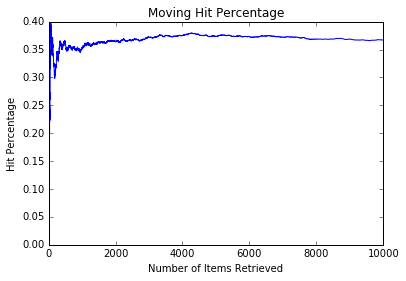

In [35]:
#Loads the CSV file
def load_file(filename):
    names = []
    try:
        f = open(filename)
        reader = csv.reader(f)
        for row in reader:
            names.append(row[0])
        f.close()
    except:
        print 'Error: Could Not Load File'
    return np.array(names)

#Creates a zipf distribution using the stats discrete module
def zipf(s, N):
    n = range(1,N+1)
    p = []
    z = 0.
    for i in n:
        temp = (1./i)**s
        p.append(temp)
        z = z+temp
    for i in range(np.size(p)): p[i]=p[i]/z
    return st.rv_discrete(name = 'Zipf', values=(n,p))

#When a hit occurs, move the hit item to the top of the list for LRU
def cache_hit(cache,item):
    # cache.index(item) is current location of item in the cache
    for i in range(cache.index(item),np.size(cache)-1):    
        cache[i] = cache[i+1]
    cache[np.size(cache)-1] = item
    return cache
    
#When a miss occurs, replace the least recently used (LRU) item
def cache_miss(cache, item):
    for i in range(np.size(cache)-1):
        cache[i]=cache[i+1]
    cache[np.size(cache)-1] = item
    return cache

#Runs the main code for the simulation
filename = 'all_names.csv'
names = load_file(filename) #This is treated as your memory
rv_zipf = zipf(1.0,np.size(names))
k = 50 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
plt.title('Moving Hit Percentage')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
print 'Hit Percentage:', hit_av[np.size(hit_av)-1]

<br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Use the code given above to do the following:
<ol>
<li> Create a new simulation using a random replacement policy. What is the impact on the hit percentage? Plot the moving hit percentage under this policy.</li>
<li> We used a Zipf distribution to represent the retrieval requests. It is a heavy tailed distribution with two parameters s and N. Run the given LRU simulation, but vary the s value from 0.5 to 3 in .5 increments. Plot the moving hit percentage under each of these conditions. Why might this be occuring? (The answer lies in the structure of the Zipf distribution)</li>
<li> Setting s=1.0 again for the LRU simulation, print out the cache hit rate for k=50, 100, 400, respectively.  How does the cache hit rate vary with the cache size k? Why is that?  
<li> Explain whether or not the state of the cache in this experiment can be viewed as a Markov process, both for the LRU policy and for the random replacement policy.</li>

#1:
Hit Percentage: 0.3059
For this question, change the cache_miss(cache, item) function.
Randomly replace one element in cache by item.


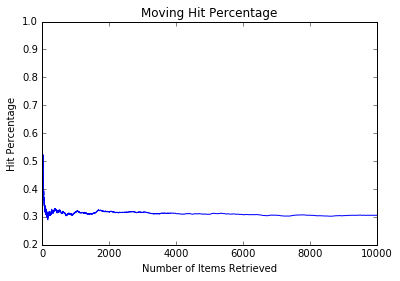

In [68]:
#1:
#When a miss occurs, replace the randomely(RR)
def cache_miss(cache, item):
    cache[random.randrange(np.size(cache))] = item
    return cache

#Runs the main code for the simulation
filename = 'all_names.csv'
names = load_file(filename) #This is treated as your memory
rv_zipf = zipf(1.0,np.size(names))
k = 50 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
plt.title('Moving Hit Percentage')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
print "#1:"
print 'Hit Percentage:', hit_av[np.size(hit_av)-1]
print "For this question, change the cache_miss(cache, item) function."
print "Randomly replace one element in cache by item."

Hit Percentage: 0.0244
Hit Percentage: 0.3458
Hit Percentage: 0.8194
Hit Percentage: 0.9468
Hit Percentage: 0.9802
Hit Percentage: 0.9929
As we increase s, the hit percentages increases.
Zipf(s) function is propotional to 1/(i**S).
Therefore, when s increases, the tail of zipf(s) decreases.
Because Zip(s) have small tail, an item is more likely to be found.
Therefore, the hit percentage went up as s increases.


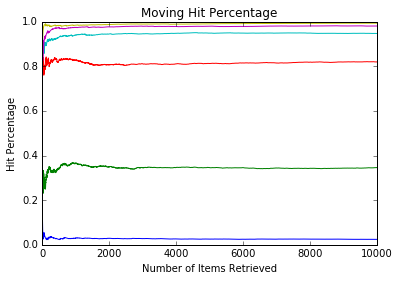

In [89]:
#2:
#When a miss occurs, replace the least recently used (LRU) item
def cache_miss(cache, item):
    for i in range(np.size(cache)-1):
        cache[i]=cache[i+1]
    cache[np.size(cache)-1] = item
    return cache

j = 0.5
while j<=3:
    #Runs the main code for the simulation
    filename = 'all_names.csv'
    names = load_file(filename) #This is treated as your memory
    rv_zipf = zipf(j,np.size(names))
    k = 50 #Size of the Cache
    r = 10000 #Number of retrievals
    hits = 0. #Keeps track of the number of hits in the cache
    hit_av = [] #Keeps track of the hit average
    cache = [] #List to represent the cache

    # We first fill cache with k items.  We don't check for
    # duplicates because if item stream is not diverse this
    # step could cause infinite loop.
    while np.size(cache) < k:                 
        rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        cache.append(item)

    for i in range(r):
        rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
        item = names[rv]    #Item to be retrieved
        if item in cache:
            cache = cache_hit(cache, item)
            hits = hits+1
        else:
            cache = cache_miss(cache, item)
        hit_av.append(hits/(i+1))

    plt.plot(hit_av)
    plt.title('Moving Hit Percentage')
    plt.xlabel('Number of Items Retrieved')
    plt.ylabel('Hit Percentage')
    print 'Hit Percentage:', hit_av[np.size(hit_av)-1]
    j=j+0.5
print "As we increase s, the hit percentages increases." 
print "Zipf(s) function is propotional to 1/(i**S)."
print "Therefore, when s increases, the tail of zipf(s) decreases."
print "Because Zip(s) have small tail, an item is more likely to be found."
print "Therefore, the hit percentage went up as s increases."
    

#3:
Hit Percentage(k=50): 0.3527
Hit Percentage(k=100): 0.4324
Hit Percentage(k=400): 0.5989
The Hit Percentage increases as k increases. This make sense because when we increase the size of the cache,
we are more likely to find an intem in the cache.


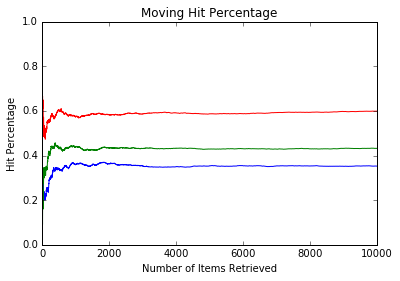

In [85]:
#When a miss occurs, replace the least recently used (LRU) item
def cache_miss(cache, item):
    for i in range(np.size(cache)-1):
        cache[i]=cache[i+1]
    cache[np.size(cache)-1] = item
    return cache
#Runs the main code for the simulation
filename = 'all_names.csv'
names = load_file(filename) #This is treated as your memory
rv_zipf = zipf(1.0,np.size(names))
k = 50 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
plt.title('Moving Hit Percentage')
plt.xlabel('Number of Items Retrieved')
plt.ylabel('Hit Percentage')
print "#3:"
print 'Hit Percentage(k=50):', hit_av[np.size(hit_av)-1]

#########################################################
# k = 100
k = 100 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
print 'Hit Percentage(k=100):', hit_av[np.size(hit_av)-1]

#########################################################
# k = 400
k = 400 #Size of the Cache
r = 10000 #Number of retrievals
hits = 0. #Keeps track of the number of hits in the cache
hit_av = [] #Keeps track of the hit average
cache = [] #List to represent the cache

# We first fill cache with k items.  We don't check for
# duplicates because if item stream is not diverse this
# step could cause infinite loop.
while np.size(cache) < k:                 
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    cache.append(item)
        
for i in range(r):
    rv = rv_zipf.rvs()-1   #Random variate from the zipf distribution
    item = names[rv]    #Item to be retrieved
    if item in cache:
        cache = cache_hit(cache, item)
        hits = hits+1
    else:
        cache = cache_miss(cache, item)
    hit_av.append(hits/(i+1))

plt.plot(hit_av)
print 'Hit Percentage(k=400):', hit_av[np.size(hit_av)-1]
print "The Hit Percentage increases as k increases. This make sense because when we increase the size of the cache,"
print "we are more likely to find an intem in the cache."


#4. 
The state of the cache in this experiment can be viewed as a Markov prcess, for both the LRU policy and the random replacemnt policy. For LRU policy, the next state is itself (if hits) and the next state (miss) is depend on the current state. This is because the current state determines what the Least recently used element was. Therefore, it decides the next state. Each state will produce an unique probability matrix. For the RR policy, elements in each state have the equal probability to be replaced. However, it is still a markov process. This assembles a random walk. The current state determines the next state even though there are k different possible next states.

## Lab Questions:

Make sure to complete all lab questions 1-3 for this weeks lab.